## Euclidean and Manhattan Distance Calculations

In this short mini project, will see examples and comparisons of distance measures. Specifically, we will visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms we will be using such as Prinical Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Load Course Numerical Dataset
df = pd.read_csv('data/distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [17]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid5 = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)
distEuclid5

0       1.146017
1       1.335918
2       3.086419
3       0.771428
4       2.829148
          ...   
1995    1.111182
1996    3.075636
1997    3.190348
1998    0.658660
1999    2.857604
Length: 2000, dtype: float64

**<font color='teal'>Creating a distance to reference point (3,3) matrix similar to the above example.</font>**

In [18]:
distEuclid3 = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)
distEuclid3

0       3.022262
1       4.151203
2       4.547162
3       3.456205
4       1.063003
          ...   
1995    2.721163
1996    5.479017
1997    3.834477
1998    3.229189
1999    5.350437
Length: 2000, dtype: float64

**<font color='teal'>Replacing the value set to 'c' in the plotting cell below with our own distance matrix and reviewing the result of Euclidean distances. </font>**

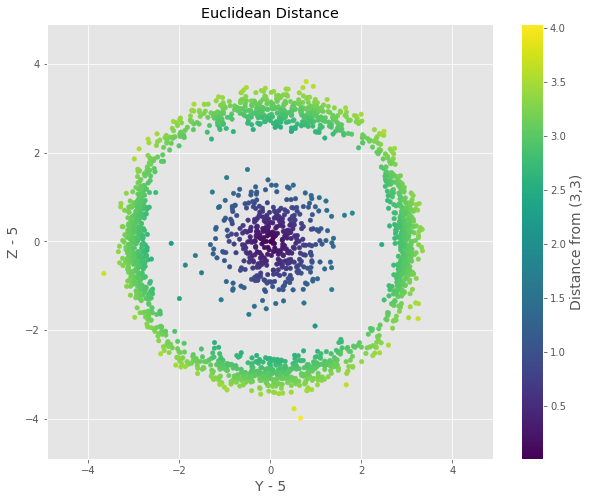

In [21]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid5, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

#figEuclid.savefig('plots/Euclidean.png')

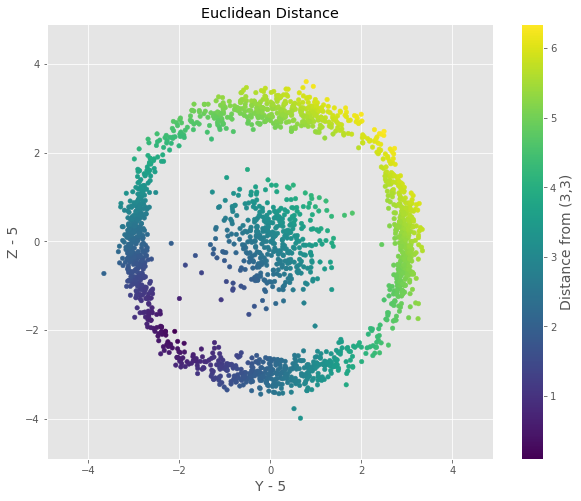

In [23]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid3, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [24]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan5 = np.abs(df.X - 5) + np.abs(df.Z - 5)
distManhattan5

0       0.923415
1       1.810324
2       5.081859
3       1.238538
4       3.739102
          ...   
1995    0.906694
1996    3.321762
1997    4.779125
1998    0.408304
1999    2.889332
Length: 2000, dtype: float64

**<font color='teal'>Creating a Manhattan distance to reference point (4,4) matrix similar to the above example and replacing the value for 'c' in the plotting cell to view the result.</font>**

In [25]:
distManhattan4 = np.abs(df.X - 4) + np.abs(df.Z - 4)
distManhattan4

0       2.923415
1       2.371765
2       5.081859
3       3.238538
4       1.739102
          ...   
1995    2.139184
1996    4.828132
1997    4.779125
1998    1.591696
1999    4.800204
Length: 2000, dtype: float64

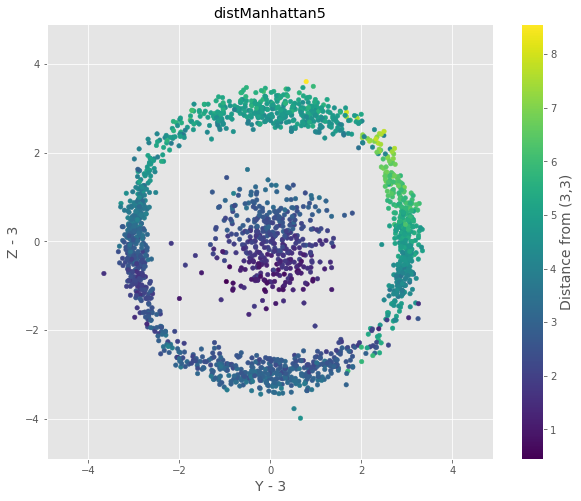

In [26]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distManhattan4, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('distManhattan5')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

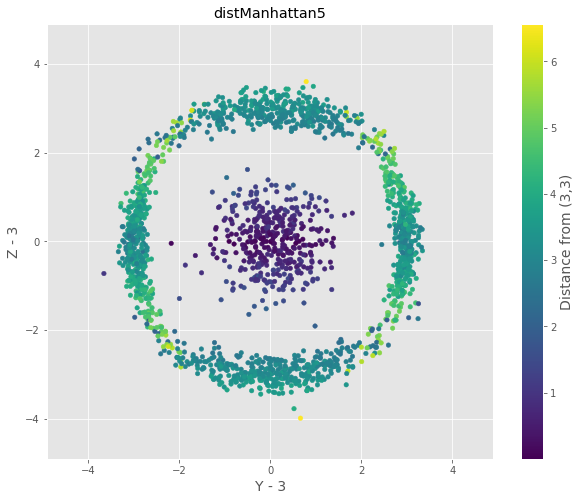

In [27]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distManhattan5, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('distManhattan5')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how we manually created them earlier in the exercise.

In [29]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

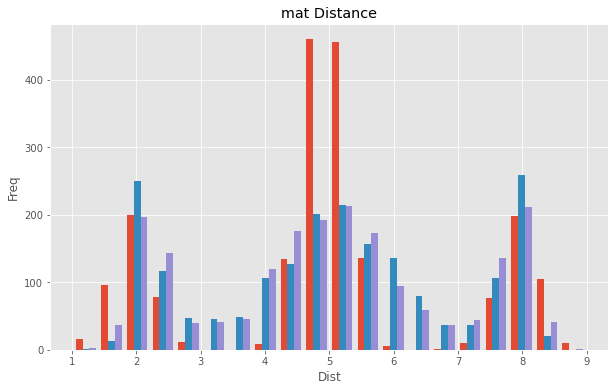

In [44]:
plt.figure(figsize=(10,6))

plt.hist(mat, bins=20)
plt.title('mat Distance')
plt.xlabel("Dist")
plt.ylabel("Freq")


plt.show()


Text(0, 0.5, 'Freq')

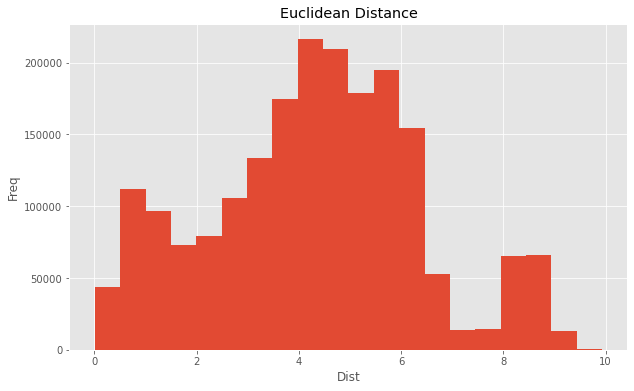

In [46]:

plt.figure(figsize=(10,6))

plt.hist(DistEuclid, bins=20)
plt.title('Euclidean Distance')
plt.xlabel("Dist")
plt.ylabel("Freq")



Text(0, 0.5, 'Freq')

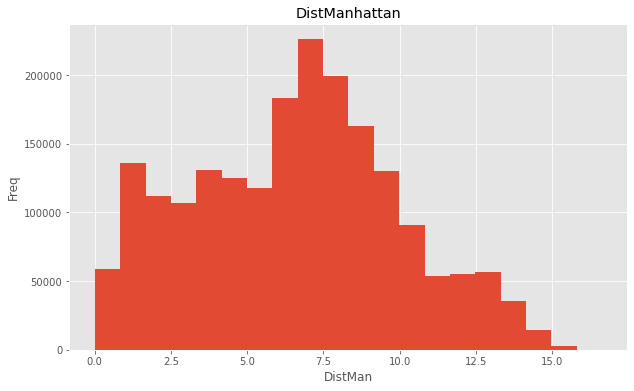

In [47]:
plt.figure(figsize=(10,6))

plt.hist(DistManhattan, bins=20)
plt.title('DistManhattan')
plt.xlabel("DistMan")
plt.ylabel("Freq")

Text(0, 0.5, 'Freq')

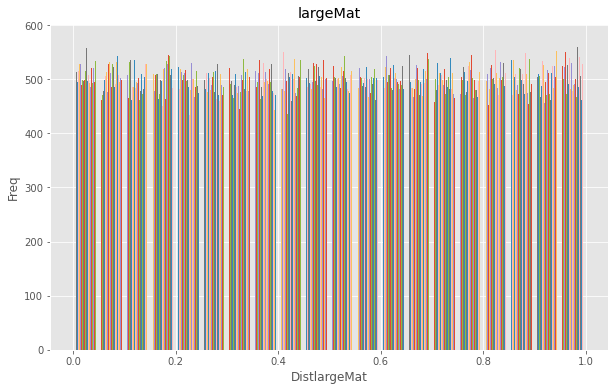

In [49]:
plt.figure(figsize=(10,6))

plt.hist(largeMat, bins=20)
plt.title('largeMat')
plt.xlabel("DistlargeMat")
plt.ylabel("Freq")


#largeMat

**<font color='teal'>Ploting histograms of each distance matrix for comparison.</font>**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


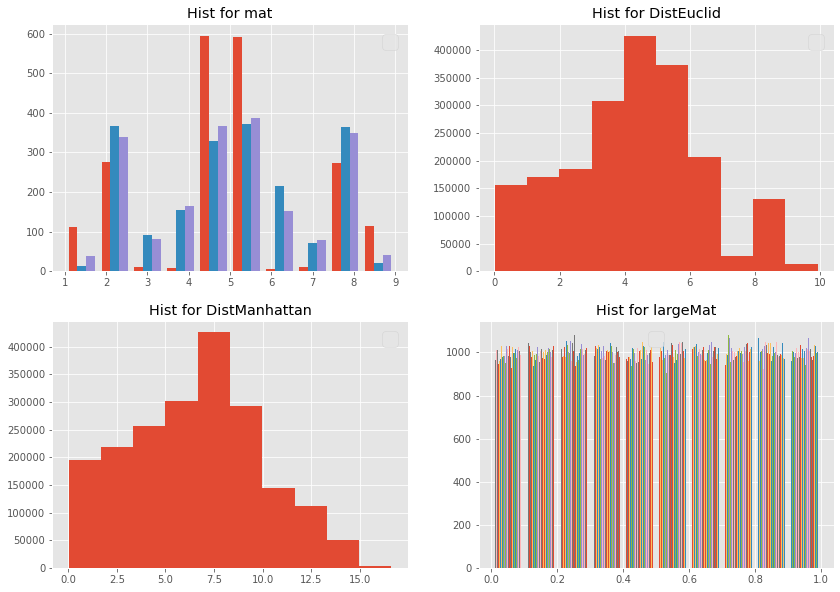

In [13]:
import numpy as np
import matplotlib.pyplot as plt


#olors = ['red', 'tan', 'lime']
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

ax0.hist(mat, bins = 10)
ax0.legend(prop={'size': 20})
ax0.set_title('Hist for mat')

ax1.hist(DistEuclid, bins = 10)
ax1.legend(prop={'size': 20})
ax1.set_title('Hist for DistEuclid')

ax2.hist(DistManhattan, bins = 10)
ax2.legend(prop={'size': 20})
ax2.set_title('Hist for DistManhattan')

ax3.hist(largeMat, bins = 10)
ax3.legend(prop={'size': 20})
ax3.set_title('Hist for largeMat')

plt.show()
